In [65]:
import torch
from glob import glob
import pydicom
import os
from matplotlib import pyplot as plt
import numpy as np

In [70]:
root = r"A:/Code/YoloAll/inputs/pancreas/1-001.dcm"
newroot = "/".join(root.split("/")[:-1]) + "/*.dcm"
len(glob(newroot))

240

In [21]:
def loadimg(img):
    instance = pydicom.read_file(img)
    data = instance.pixel_array
    return data
def normalization(img, low, high):
    img = np.clip(img, low, high)
    return (img-low) / (high-low)    

(512, 512)


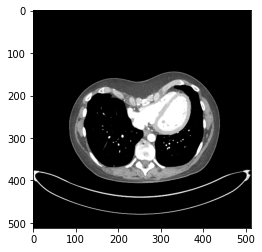

In [25]:
for dir in glob(newroot, recursive=True):
    img = loadimg(dir)
    img = normalization(img, -240, 210)
    img = np.flipud(img)
    print(img.shape)
    plt.imshow(img, cmap='gray')
    plt.show()
    break

In [37]:
import cv2
a = cv2.imread(r"./inputs/pancreas.jpg")   
type(a)

numpy.ndarray

In [62]:
b = pydicom.read_file(r"./inputs/pancreas/1-001.dcm")
c = b.pixel_array
c = normalization(c, -230, 210) * 255
c = np.stack((c,c,c), axis=2).astype(np.uint8)

In [63]:
from PIL import Image
img = Image.fromarray(c.astype(np.uint8))
img.show()